In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

In [92]:
df = pd.read_csv('../data/1.Обрезка и замена аномалий.csv')
#df = pd.read_csv('../data/Пропуски для сравнения визуализации.csv')
dates = pd.to_datetime(df.columns,format='%d.%m.%Y')

In [93]:
df_ts_temp = df.copy()
missing_values_count = df_ts_temp.isnull().sum(axis=1)
df_ts_temp['Missing_Values_Count'] = missing_values_count*100/len(df.columns)
df_ts_temp = df_ts_temp.sort_values('Missing_Values_Count')
#del df_ts_temp['Missing_Values_Count']

In [88]:
df_ts_temp

,01.07.2018,02.07.2018,03.07.2018,04.07.2018,05.07.2018,06.07.2018,07.07.2018,08.07.2018,09.07.2018,10.07.2018,...,22.06.2021,23.06.2021,24.06.2021,25.06.2021,26.06.2021,27.06.2021,28.06.2021,29.06.2021,30.06.2021,Missing_Values_Count
0,0.088942,0.090843,0.093701,0.093719,0.092230,0.127352,0.122671,0.085567,0.092951,0.100435,...,0.086349,0.091394,0.087394,0.113629,0.102719,0.080159,0.077596,0.084560,0.082509,0.000000
569,0.088529,0.077736,0.085610,0.089069,0.084727,0.091454,0.091175,0.076785,0.074068,0.075523,...,0.099958,0.095138,0.093234,0.060891,0.078405,0.087733,0.078530,0.082191,0.086826,0.000000
570,0.099156,0.097659,0.104302,0.103729,0.110492,0.132588,0.108938,0.101516,0.106715,0.093325,...,0.137378,0.138880,0.140638,0.170886,0.154456,0.130273,0.133205,0.137284,0.119320,0.000000
571,0.050234,0.046280,0.048180,0.042749,0.047536,0.055294,0.053364,0.043077,0.051224,0.051387,...,0.051581,0.053220,0.050429,0.051377,0.049148,0.047457,0.055445,0.053091,0.055920,0.000000
572,0.045768,0.050199,0.049623,0.054767,0.048011,0.053538,0.062829,0.048189,0.048958,0.049364,...,0.035694,0.035281,0.038360,0.038175,0.036499,0.028337,0.038361,0.031219,0.026399,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.042867,0.040190,0.040209,0.047403,0.046494,0.036686,0.042619,0.035890,0.040386,97.354015
1582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.050485,0.053793,0.051019,0.061885,0.061305,0.058887,0.052469,0.051184,0.050126,97.354015
1583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.075854,0.096075,0.098332,0.111129,0.116141,0.069101,0.059026,0.064441,0.061389,97.627737
1584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.045963,0.044372,0.047269,0.052155,0.050783,0.042665,0.046191,0.048926,0.048317,97.992701


In [94]:
df

In [95]:
df

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [5]:
tf.random.set_seed(7)

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

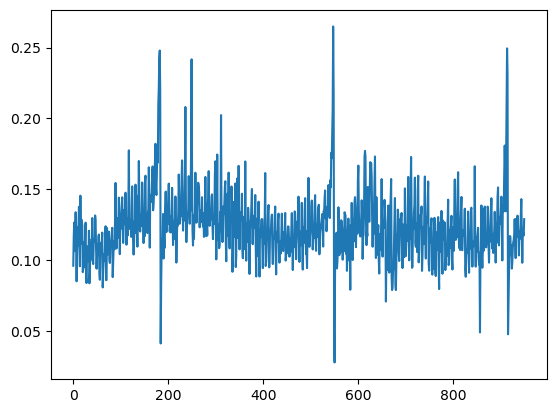

In [6]:
dataset = df.values[0][:950].reshape(-1,1)
plt.plot(dataset)

Восстановление

760 190
Epoch 1/200


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


758/758 - 2s - 3ms/step - loss: 0.0292
Epoch 2/200
758/758 - 1s - 882us/step - loss: 0.0079
Epoch 3/200
758/758 - 1s - 841us/step - loss: 0.0077
Epoch 4/200
758/758 - 1s - 864us/step - loss: 0.0075
Epoch 5/200
758/758 - 1s - 860us/step - loss: 0.0074
Epoch 6/200
758/758 - 1s - 841us/step - loss: 0.0073
Epoch 7/200
758/758 - 1s - 845us/step - loss: 0.0073
Epoch 8/200
758/758 - 1s - 837us/step - loss: 0.0073
Epoch 9/200
758/758 - 1s - 841us/step - loss: 0.0072
Epoch 10/200
758/758 - 1s - 842us/step - loss: 0.0072
Epoch 11/200
758/758 - 1s - 828us/step - loss: 0.0072
Epoch 12/200
758/758 - 1s - 846us/step - loss: 0.0072
Epoch 13/200
758/758 - 1s - 843us/step - loss: 0.0072
Epoch 14/200
758/758 - 1s - 834us/step - loss: 0.0072
Epoch 15/200
758/758 - 1s - 840us/step - loss: 0.0072
Epoch 16/200
758/758 - 1s - 858us/step - loss: 0.0072
Epoch 17/200
758/758 - 1s - 841us/step - loss: 0.0072
Epoch 18/200
758/758 - 1s - 829us/step - loss: 0.0072
Epoch 19/200
758/758 - 1s - 793us/step - loss: 0.00

758/758 - 1s - 844us/step - loss: 0.0072
Epoch 153/200
758/758 - 1s - 838us/step - loss: 0.0072
Epoch 154/200
758/758 - 1s - 813us/step - loss: 0.0072
Epoch 155/200
758/758 - 1s - 808us/step - loss: 0.0072
Epoch 156/200
758/758 - 1s - 847us/step - loss: 0.0072
Epoch 157/200
758/758 - 1s - 853us/step - loss: 0.0072
Epoch 158/200
758/758 - 1s - 863us/step - loss: 0.0072
Epoch 159/200
758/758 - 1s - 818us/step - loss: 0.0072
Epoch 160/200
758/758 - 1s - 872us/step - loss: 0.0072
Epoch 161/200
758/758 - 1s - 866us/step - loss: 0.0072
Epoch 162/200
758/758 - 1s - 872us/step - loss: 0.0072
Epoch 163/200
758/758 - 1s - 776us/step - loss: 0.0072
Epoch 164/200
758/758 - 1s - 816us/step - loss: 0.0072
Epoch 165/200
758/758 - 1s - 863us/step - loss: 0.0072
Epoch 166/200
758/758 - 1s - 863us/step - loss: 0.0072
Epoch 167/200
758/758 - 1s - 855us/step - loss: 0.0072
Epoch 168/200
758/758 - 1s - 868us/step - loss: 0.0072
Epoch 169/200
758/758 - 1s - 888us/step - loss: 0.0072
Epoch 170/200
758/758 - 

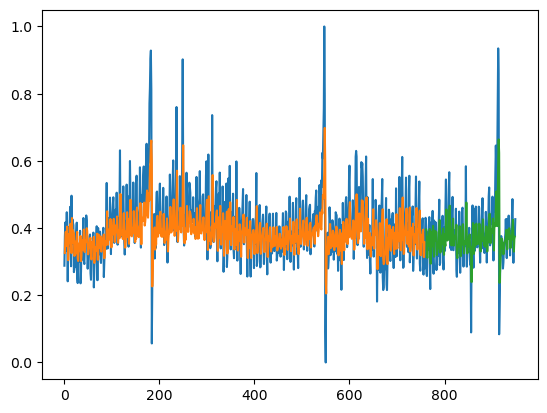

In [114]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)



# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))



# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)#scaler.inverse_transform(dataset),alpha=0.4)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Восстановление похожими данными

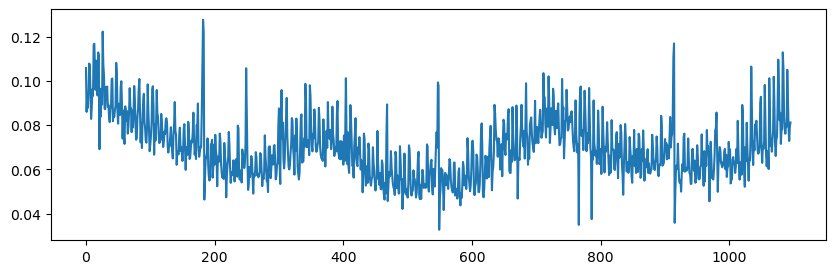

In [66]:
plt.figure(figsize=(10,3))
plt.plot(df.values[3])
plt.show()

In [67]:
def find_gaps(time_series):
    gap_indices = []
    
    start_index = None
    
    for i in range(len(time_series)):
        if np.isnan(time_series[i]):
            # Если это начало нового пропуска, сохраняем индекс
            if start_index is None:
                start_index = i
        else:
            if start_index is not None:
                gap_indices.append([start_index, i - 1])
                start_index = None
    
    if start_index is not None:
        gap_indices.append([start_index, len(time_series) - 1])
    
    return gap_indices

time_series = df.values[3]
print(find_gaps(time_series))

[]


In [68]:
time_series 

array([0.10580791, 0.08604293, 0.09360872, ..., 0.07287229, 0.07943725,
       0.08121593])

In [98]:
for i in range(len(df_ts_temp.values)):
    if df_ts_temp['Missing_Values_Count'][i]<20:
        time_series = df_ts_temp.values[i]
        filled_series =  fill_missing_values(time_series)
        df_ts_temp.iloc[i] = filled_series


In [99]:
df

In [54]:
df_temp

,01.07.2018,02.07.2018,03.07.2018,04.07.2018,05.07.2018,06.07.2018,07.07.2018,08.07.2018,09.07.2018,10.07.2018,...,21.06.2021,22.06.2021,23.06.2021,24.06.2021,25.06.2021,26.06.2021,27.06.2021,28.06.2021,29.06.2021,30.06.2021
0,322270.94,329156.84,339510.05,339575.65,334181.49,461408.57,444453.64,310044.46,336794.06,363902.63,...,342696.23,312876.26,331154.12,316662.25,411697.97,372178.02,290454.12,281168.40,306396.56,298968.58
1,268121.86,341397.93,263519.31,241601.17,310985.54,421165.40,381520.68,305951.91,352760.19,292607.24,...,350202.52,322239.44,338704.89,342856.22,460793.74,370608.75,325532.49,372592.58,266199.99,270698.88
2,260022.22,228146.58,328764.57,266628.07,294289.06,345077.17,397654.64,292024.86,264332.36,414065.62,...,359639.21,451173.76,350656.68,376105.75,467450.32,514643.65,386320.49,304531.28,371476.93,320137.57
3,383366.87,311768.48,339175.44,318172.80,347015.64,390910.96,388388.18,347012.03,300103.71,318116.98,...,284759.30,275829.97,290689.30,287252.79,380638.53,331533.03,285870.29,264058.00,287839.48,294282.73
4,268092.69,309996.36,292509.76,324417.45,291098.89,416592.23,541976.28,306793.95,321326.17,335832.68,...,446462.15,432822.93,447924.59,413151.29,506604.11,587609.87,403538.63,298535.57,362676.25,440735.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,147009.37,155363.31,145665.81,145737.04,171795.89,168503.03,132974.23,154466.98,130088.64,146375.22
1582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,197238.24,182961.90,194942.49,184893.14,224257.70,222155.29,213396.87,190147.39,185491.32,181659.41
1583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,261790.31,274858.91,348108.86,356284.74,402640.65,420796.88,250395.70,213901.45,233516.02,222460.52
1584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,153473.58,166579.88,160817.42,171311.95,189008.97,184039.64,154631.39,167405.70,177313.38,175106.55


In [56]:
df_temp

,Unnamed: 0,01.07.2018,02.07.2018,03.07.2018,04.07.2018,05.07.2018,06.07.2018,07.07.2018,08.07.2018,09.07.2018,...,21.06.2021,22.06.2021,23.06.2021,24.06.2021,25.06.2021,26.06.2021,27.06.2021,28.06.2021,29.06.2021,30.06.2021
0,792,322270.94,329156.84,339510.05,339575.65,334181.49,461408.57,444453.64,310044.46,336794.06,...,342696.23,312876.26,331154.12,316662.25,411697.97,372178.02,290454.12,281168.40,306396.56,298968.58
1,672,268121.86,341397.93,263519.31,241601.17,310985.54,421165.40,381520.68,305951.91,352760.19,...,350202.52,322239.44,338704.89,342856.22,460793.74,370608.75,325532.49,372592.58,266199.99,270698.88
2,673,260022.22,228146.58,328764.57,266628.07,294289.06,345077.17,397654.64,292024.86,264332.36,...,359639.21,451173.76,350656.68,376105.75,467450.32,514643.65,386320.49,304531.28,371476.93,320137.57
3,675,383366.87,311768.48,339175.44,318172.80,347015.64,390910.96,388388.18,347012.03,300103.71,...,284759.30,275829.97,290689.30,287252.79,380638.53,331533.03,285870.29,264058.00,287839.48,294282.73
4,676,268092.69,309996.36,292509.76,324417.45,291098.89,416592.23,541976.28,306793.95,321326.17,...,446462.15,432822.93,447924.59,413151.29,506604.11,587609.87,403538.63,298535.57,362676.25,440735.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,147009.37,155363.31,145665.81,145737.04,171795.89,168503.03,132974.23,154466.98,130088.64,146375.22
1582,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,197238.24,182961.90,194942.49,184893.14,224257.70,222155.29,213396.87,190147.39,185491.32,181659.41
1583,950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,261790.31,274858.91,348108.86,356284.74,402640.65,420796.88,250395.70,213901.45,233516.02,222460.52
1584,417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,153473.58,166579.88,160817.42,171311.95,189008.97,184039.64,154631.39,167405.70,177313.38,175106.55


In [74]:
df

,01.07.2018,02.07.2018,03.07.2018,04.07.2018,05.07.2018,06.07.2018,07.07.2018,08.07.2018,09.07.2018,10.07.2018,...,21.06.2021,22.06.2021,23.06.2021,24.06.2021,25.06.2021,26.06.2021,27.06.2021,28.06.2021,29.06.2021,30.06.2021
0,0.088942,0.090843,0.093701,0.093719,0.092230,0.127352,0.122671,0.085567,0.092951,0.100435,...,0.094581,0.086349,0.091394,0.087394,0.113629,0.102719,0.080159,0.077596,0.084560,0.082509
1,0.073994,0.094222,0.072724,0.066673,0.085827,0.116242,0.105298,0.084437,0.097359,0.080753,...,0.096653,0.088933,0.093479,0.094625,0.127182,0.102286,0.089843,0.102834,0.073464,0.074706
2,0.071758,0.062959,0.090735,0.073582,0.081218,0.095238,0.109752,0.080593,0.072948,0.114282,...,0.099258,0.124526,0.096778,0.103803,0.129019,0.142047,0.106623,0.084045,0.102526,0.088353
3,0.105808,0.086043,0.093609,0.087811,0.095773,0.107890,0.107194,0.095772,0.082823,0.087795,...,0.078587,0.076122,0.080224,0.079275,0.105055,0.091499,0.078894,0.072872,0.079437,0.081216
4,0.073986,0.085554,0.080726,0.089535,0.080337,0.114980,0.149593,0.084670,0.088681,0.092686,...,0.123226,0.119460,0.123629,0.114030,0.139828,0.162190,0.111376,0.082390,0.100096,0.121645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.040561,0.042867,0.040190,0.040209,0.047403,0.046494,0.036686,0.042619,0.035890,0.040386
1582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.054426,0.050485,0.053793,0.051019,0.061885,0.061305,0.058887,0.052469,0.051184,0.050126
1583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.072246,0.075854,0.096075,0.098332,0.111129,0.116141,0.069101,0.059026,0.064441,0.061389
1584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.042345,0.045963,0.044372,0.047269,0.052155,0.050783,0.042665,0.046191,0.048926,0.048317


In [106]:
df_ts_temp['i'] = df_temp['Unnamed: 0']

In [108]:
df_ts_temp.set_index('i',inplace=True)

In [110]:
df_ts_temp

,01.07.2018,02.07.2018,03.07.2018,04.07.2018,05.07.2018,06.07.2018,07.07.2018,08.07.2018,09.07.2018,10.07.2018,...,22.06.2021,23.06.2021,24.06.2021,25.06.2021,26.06.2021,27.06.2021,28.06.2021,29.06.2021,30.06.2021,Missing_Values_Count
i,,,,,,,,,,,,,,,,,,,,,
792,0.088942,0.090843,0.093701,0.093719,0.092230,0.127352,0.122671,0.085567,0.092951,0.100435,...,0.086349,0.091394,0.087394,0.113629,0.102719,0.080159,0.077596,0.084560,0.082509,0.000000
1462,0.088529,0.077736,0.085610,0.089069,0.084727,0.091454,0.091175,0.076785,0.074068,0.075523,...,0.099958,0.095138,0.093234,0.060891,0.078405,0.087733,0.078530,0.082191,0.086826,0.000000
224,0.099156,0.097659,0.104302,0.103729,0.110492,0.132588,0.108938,0.101516,0.106715,0.093325,...,0.137378,0.138880,0.140638,0.170886,0.154456,0.130273,0.133205,0.137284,0.119320,0.000000
225,0.050234,0.046280,0.048180,0.042749,0.047536,0.055294,0.053364,0.043077,0.051224,0.051387,...,0.051581,0.053220,0.050429,0.051377,0.049148,0.047457,0.055445,0.053091,0.055920,0.000000
226,0.045768,0.050199,0.049623,0.054767,0.048011,0.053538,0.062829,0.048189,0.048958,0.049364,...,0.035694,0.035281,0.038360,0.038175,0.036499,0.028337,0.038361,0.031219,0.026399,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.042867,0.040190,0.040209,0.047403,0.046494,0.036686,0.042619,0.035890,0.040386,97.354015
949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.050485,0.053793,0.051019,0.061885,0.061305,0.058887,0.052469,0.051184,0.050126,97.354015
950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.075854,0.096075,0.098332,0.111129,0.116141,0.069101,0.059026,0.064441,0.061389,97.627737


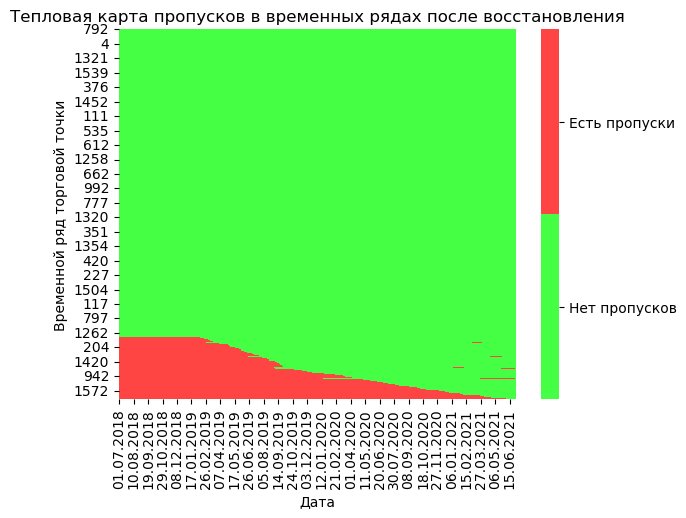

In [109]:
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt

cmap_colors = ['#44FF44','#FF4444']
cbar_ticks = [0.25, 0.75]  # для центрирования подписей
df_temp = pd.read_csv('../data/Пропуски для сравнения визуализации.csv')
#df_temp.set_index('Unnamed: 0', inplace=True)

ax = sns.heatmap(df_ts_temp.isnull(), cmap=cmap_colors, cbar=True, cbar_kws={'ticks': cbar_ticks})
plt.title('Тепловая карта пропусков в временных рядах после восстановления')
plt.ylabel('Временной ряд торговой точки')
plt.xlabel('Дата')
cbar = ax.collections[0].colorbar
cbar.set_ticks(cbar_ticks)
cbar.set_ticklabels(['Нет пропусков', 'Есть пропуски'])
plt.show()

In [28]:
df= df.dropna()

In [29]:
def custom_formatter(x, pos):
    """Функция для форматирования меток на шкале y в тысячах и миллионах"""
    if x >= 1e6:
        return f'{x / 1e6:.0f}'
    elif x >= 1e3:
        return f'{x / 1e3:.0f}K'
    elif x < 1e3:
        return f'{x :.0f}'


def draw_time_series(ts, dates, title: str, mode = 'show'):
    plt.figure(figsize=(13, 3))
    plt.plot(dates, ts, linewidth=0.8)

    # Настройка шкалы y
    formatter = FuncFormatter(custom_formatter)
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.grid(linestyle='dotted')

    plt.title(title)
    plt.xlabel('Дата')
    plt.ylabel('Выручка, руб.')
    plt.show()
    
    if mode == 'save':
        plt.savefig(f'{path}{title}.png')
        plt.close()

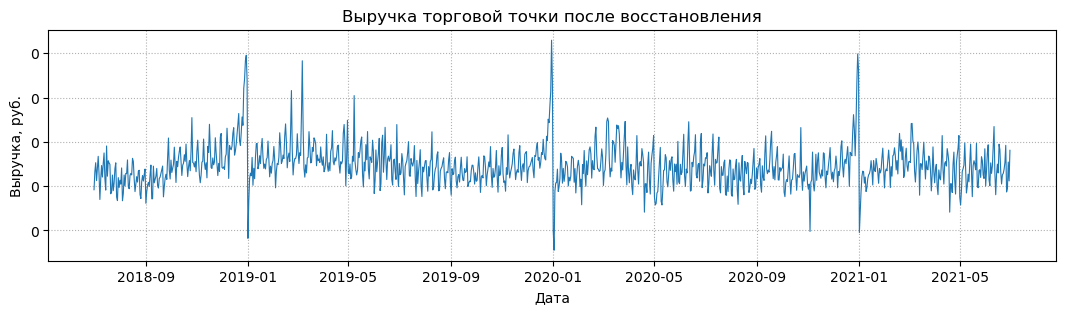

In [30]:
draw_time_series(df.values[0],dates, f'Выручка торговой точки после восстановления') 

In [52]:
df.to_csv('../data/2. Восстановленные',index = False)